Importing imporant modules that i will need to import my API information

In [29]:
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt

I created a module with the API token so that I do not accidentally share that token in Github

In [13]:
from ASLSurveyKey import APIKEY

Importing my data and I am leaving the labels in the headers and questions so that I can understand my data better. I am also only selecting record IDs for participants who finished all 3 surveys/the ASLTB and ASLCT which is why I am requesting specific record numbers. I am writing data into a csv file to view for sanity reasons.

In [25]:
data = {
    'token': APIKEY,
    'content': 'record',
    'action': 'export',
    'format': 'csv',
    'type': 'flat',
    'csvDelimiter': '',
    'records[0]': '24',
    'records[1]': '39',
    'records[2]': '27',
    'records[3]': '35',
    'records[4]': '38',
    'records[5]': '34',
    'records[6]': '41',
    'records[7]': '31',
    'records[8]': '33',
    'records[9]': '37',
    'records[10]': '29',
    'records[11]': '44',
    'records[12]': '45',
    'records[13]': '46',
    'records[14]': '48',
    'records[15]': '49',
    'records[16]': '55',
    'records[17]': '51',
    'records[18]': '53',
    'records[19]': '54',
    'records[20]': '58',
    'records[21]': '25',
    'records[22]': '36',
    'records[23]': '70',
    'records[24]': '75',
    'records[25]': '77',
    'records[26]': '82',
    'records[27]': '88',
    'records[28]': '74',
    'records[29]': '85',
    'records[30]': '79',
    'records[31]': '68',
    'records[32]': '72',
    'records[33]': '91',
    'records[34]': '94',
    'records[35]': '103',
    'records[36]': '104',
    'rawOrLabel': 'label',
    'rawOrLabelHeaders': 'label',
    'exportCheckboxLabel': 'false',
    'exportSurveyFields': 'false',
    'exportDataAccessGroups': 'false',
    'returnFormat': 'csv'
}
response = requests.post('https://redcap.iths.org/api/', data=data)

# Here I am checking if everything is working as it should
if response.status_code == 200:
    filename = 'ASLSurveyInformation.csv'
    lines = response.text.splitlines()
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(csv.reader(lines))
#This tells me what the file name is so I don't have to go back through this code to remember what I saved it as
    print('Data written to', filename)
#This will tell me why I can't do what I want to do
else:
    print('HTTP Status:', response.status_code)
    print('Error:', response.text)

Data written to ASLSurveyInformation.csv


Here I am splitting participants up into categories based on the record numbers I have on hand for them for later analyses.

In [38]:
categories = {
    'CODA': [24, 39, 27, 35, 38, 34, 41, 31, 33, 37],
    'nonSigningHearing': [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58],
    'interpreters': [25, 36, 70],
    'ASLStudents': [75, 77, 82, 88, 74, 85, 79, 68, 72],
    'Deaf': [91, 94, 103, 104],
    'signingHearing':[24,39,27,35,38,34,41,31,33,37,25,36,70]}

Here is a simple visualization of my participant numbers as of now within the dictionary I just created. I have a total of 37 participants with useable data. I excluded "siginingHearing" because they are just a combination of my CODAs and interpreters for my later analyses.

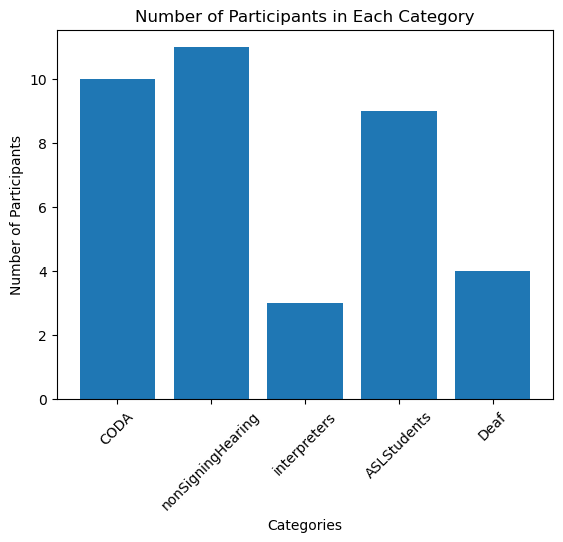

In [43]:
categories.pop('signingHearing', None)
counts = {category: len(record_numbers) for category, record_numbers in categories.items()}

# Plot the bar chart
plt.bar(counts.keys(), counts.values())
plt.xlabel('Categories')
plt.ylabel('Number of Participants')
plt.title('Number of Participants in Each Category')
plt.xticks(rotation=45)
plt.show()

Now I'm going to make the same graph from my CSV file that I created using my API token:

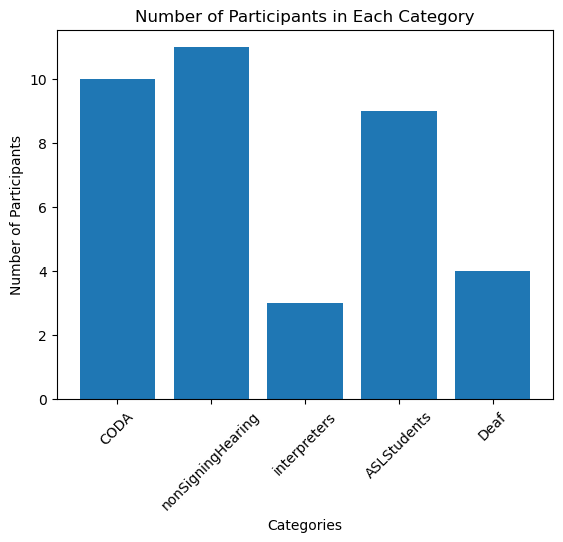

In [44]:
ASLSurveyInformation = pd.read_csv('ASLSurveyInformation.csv')

categories.pop('signingHearing', None)
counts = {category: ASLSurveyInformation['Record ID'].isin(record_numbers).sum() for category, record_numbers in categories.items()}

plt.bar(counts.keys(), counts.values())
plt.xlabel('Categories')
plt.ylabel('Number of Participants')
plt.title('Number of Participants in Each Category')
plt.xticks(rotation=45)
plt.show()


Yay it worked! Okay so now we are going to look at education levels for CODAs

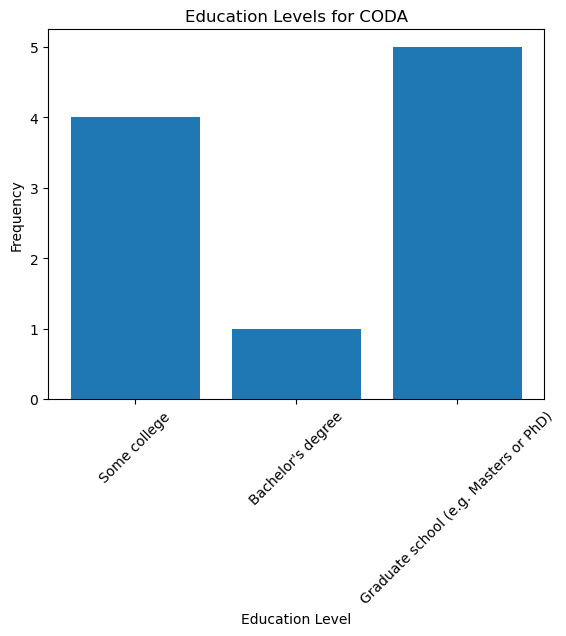

In [57]:
category = 'CODA'
record_numbers = categories[category]
category_ASLSurveyInformation = ASLSurveyInformation[ASLSurveyInformation['Record ID'].isin(record_numbers)]
response_options = [
    "Some high school/ high school graduate",
    "Some college",
    "Bachelor's degree",
    "Graduate school (e.g. Masters or PhD)"
]
education_counts = category_ASLSurveyInformation['What is your level of education?'].value_counts().reindex(response_options)
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Education Levels for {category}')
plt.xticks(rotation=45)
plt.show()

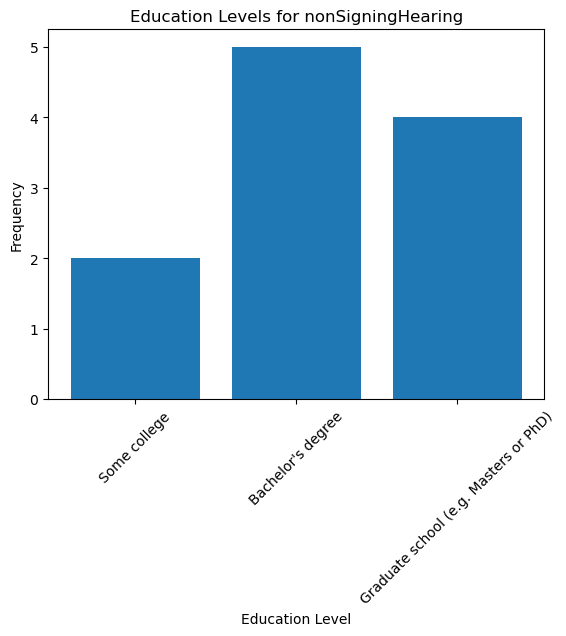

In [50]:
category = 'nonSigningHearing'
record_numbers = categories[category]
category_ASLSurveyInformation = ASLSurveyInformation[ASLSurveyInformation['Record ID'].isin(record_numbers)]
response_options = [
    "Some high school/ high school graduate",
    "Some college",
    "Bachelor's degree",
    "Graduate school (e.g. Masters or PhD)"
]
education_counts = category_ASLSurveyInformation['What is your level of education?'].value_counts().reindex(response_options)
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Education Levels for {category}')
plt.xticks(rotation=45)
plt.show()

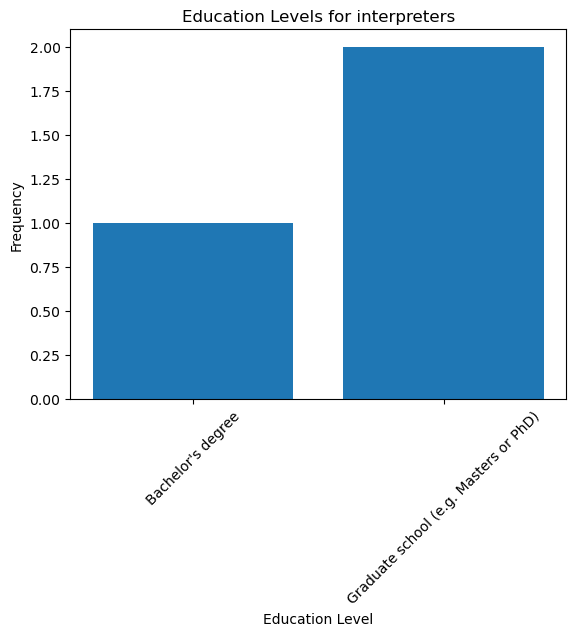

In [58]:
category = 'interpreters'
record_numbers = categories[category]
category_ASLSurveyInformation = ASLSurveyInformation[ASLSurveyInformation['Record ID'].isin(record_numbers)]
response_options = [
    "Some high school/ high school graduate",
    "Some college",
    "Bachelor's degree",
    "Graduate school (e.g. Masters or PhD)"
]
education_counts = category_ASLSurveyInformation['What is your level of education?'].value_counts().reindex(response_options)
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Education Levels for {category}')
plt.xticks(rotation=45)
plt.show()

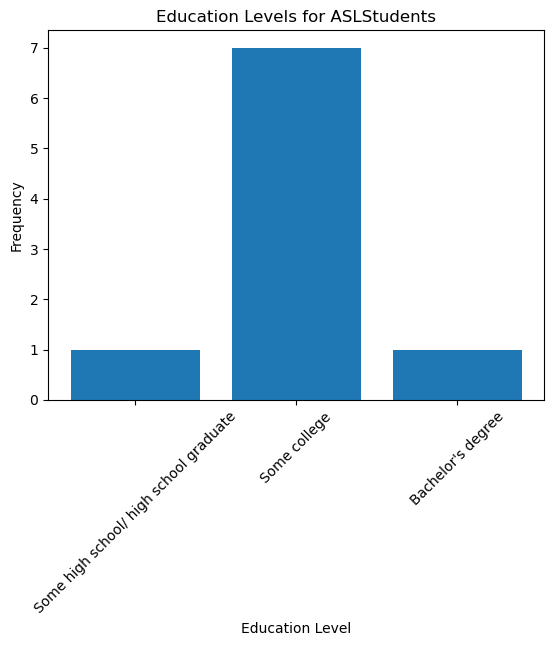

In [59]:
category = 'ASLStudents'
record_numbers = categories[category]
category_ASLSurveyInformation = ASLSurveyInformation[ASLSurveyInformation['Record ID'].isin(record_numbers)]
response_options = [
    "Some high school/ high school graduate",
    "Some college",
    "Bachelor's degree",
    "Graduate school (e.g. Masters or PhD)"
]
education_counts = category_ASLSurveyInformation['What is your level of education?'].value_counts().reindex(response_options)
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Education Levels for {category}')
plt.xticks(rotation=45)
plt.show()

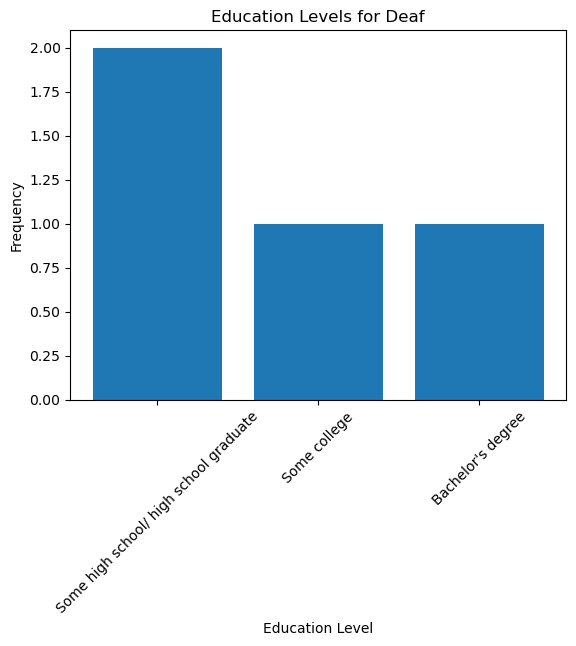

In [60]:
category = 'Deaf'
record_numbers = categories[category]
category_ASLSurveyInformation = ASLSurveyInformation[ASLSurveyInformation['Record ID'].isin(record_numbers)]
response_options = [
    "Some high school/ high school graduate",
    "Some college",
    "Bachelor's degree",
    "Graduate school (e.g. Masters or PhD)"
]
education_counts = category_ASLSurveyInformation['What is your level of education?'].value_counts().reindex(response_options)
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Education Levels for {category}')
plt.xticks(rotation=45)
plt.show()

Data seems to work well! Good start so far (: